## 개념 정리
### 용어 정리
### 핵심 패키지와 함수 (Tensorflow)
- Conv2D
    - 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스
    - 첫번째 매개변수는 합성곱 필터의 개수
    - kernel_size 매개변수
        - 필터의 커널 크기를 지정
        - 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있음
        - 일반적으로 커널의 가로세로 크기는 동일함.
        - 커널의 깊이는 입력의 깊이와 동일하기 때문에 따로 지정하지 않음
    - strides 매개변수
        - 필터의 이동 간격을 지정
        - 가로새로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있음
        - 일반적으로 가로세로 strides 크기는 동일.
        - 기본 값은 1.
    - padding 매개변수
        - 입력의 패딩 타입을 지정
        - 기본값인 valid는 패딩을 하지 않음
        - 'same'은 합성곱의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가
    - activation 매개변수
        - 합성곱층에 적용할 활성화 함수를 지정
- MaxPooling2D
    - 입력과 너비를 줄이는 풀링 연산을 구현한 클래스
    - 첫번째 매개변수는 풀링의 크기를 지정.
        - 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있음
        - 일반적으로 풀링의 가로세로 크기는 동일함.
    - strides 매개변수
        - 풀링의 이동 간격을 지정.
        - 기본값은 풀링의 크기와 동일하여, 입력 위를 겹쳐서 풀링하지 않음
    - padding 매개변수
        - 매개변수 입력의 패딩 타입을 지정.
        - 기본값인 valid는 패딩을 하지 않음
        - 'same'은 합성곱의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가
- plot_model()
    - 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 저장
    - 첫번째 매개변수에 케라스 모델 객체를 전달
    - to_file: 파일 이름을 지정하면, 그림을 파일로 저장
    - show_shapes: True로 지정하면, 층의 입력 출력 크기를 표시함. 기본값은 False.
    - show_layer_names: True로 지정하면, 층 이름을 출력. 기본값은 True.
### 핵심 패키지와 함수 (Matplotlib)
- bar()
    - 막대 그래프를 출력
    - 첫번째 매개변수: x축 값을 지정. 리스트나 Numpy 배열로 전달
    - 두번째 매개변수: y축 값을 지정. 리스트나 Numpy 배열로 전달
    - width 매개변수: 막대의 두께를 지정할 수 있음. 기본값은 0.8.

In [1]:
'''데이터 불러오고, 처리하고, 검증셋 만들기'''
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 데이터 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 데이터 전처리하기
train_scaled = train_input.reshape(-1, 28,28,1) / 255.0 # 합성곱을 위한 입력 이미지는 항상 채널(깊이정보)가 존재해야 하므로, 1개의 차원을 추가하였다.
# 검증셋 분리하기 from 훈련셋
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, random_state=42, test_size=0.2)

In [2]:
'''합성곱 신경망 만들기'''
# 합성곱 신경망
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1))) # 합성곱 층 / 필터의 크기가 32이므로 데이터의 깊이도 32로 증가함. (28,28,32)
model.add(keras.layers.MaxPooling2D(2)) # 맥스 풀링 층
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1))) # 필터의 크기를 증가시킴 (32 -> 64), 합성곱 층에서 64개의 필터(뉴런)을 사용했기 때문.
model.add(keras.layers.MaxPooling2D(2))
# 밀집 은닉층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# 모델에 대한 시각화
model.summary() # 모델의 구조 보기
keras.utils.plot_model(model) # 모델의 구조를 그림으로 표현
keras.utils.plot_model(model, show_shapes=True) # 모델의 구조를 그림으로 표현하며, 입력값의 shape도 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:
'''모델 컴파일과 훈련'''
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy') # Model Compile
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True) # Declare ModelCheckPoint Callback Object
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # Declare EarlyStopping Callback Object
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb], verbose = 1) # Train Model
model.evaluate(val_scaled, val_target) # Model Evaluation

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1501 - accuracy: 0.9440 - val_loss: 0.2354 - val_accuracy: 0.9218
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1398 - accuracy: 0.9466 - val_loss: 0.2342 - val_accuracy: 0.9194
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1316 - accuracy: 0.9501 - val_loss: 0.2525 - val_accuracy: 0.9244
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 72.9888 - accuracy: 0.8379


[72.98876190185547, 0.8378999829292297]

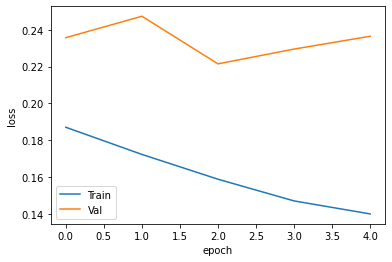

In [6]:
# 학습셋과 검증셋의 손실값 시각화 비교
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

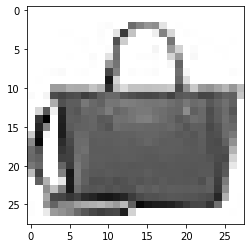

(12000, 28, 28, 1)
[[5.3405390e-24 0.0000000e+00 3.2572784e-32 5.6380053e-30 3.4647814e-29
  3.3878467e-25 3.6505389e-25 1.8391038e-25 1.0000000e+00 4.6946634e-27]]


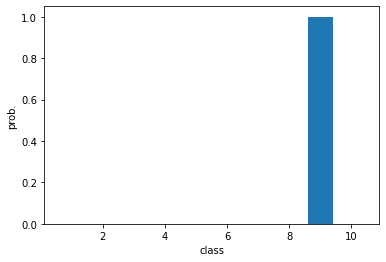

In [28]:
# 이미지로 출력해보기
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r') # 기존 데이터는 합성곱 연산을 위해 임의적으로 3차원을 만들었으나, 원래 데이터는 흑백이므로 색상데이터가 필요없어 2차원 데이터로 변환
plt.show()
print(val_scaled.shape)

# 이미지에 대한 예측 확인하기
preds = model.predict(val_scaled[0:1]) # Keras의 fit()/predict()/evaluate()는 모두 입력의 첫번째 차원이 배치 차원일 것으로 기대함. 따라서 결과 값은 (1, 28, 28, 1)과 같이 더 추가됨. 따라서 슬라이싱을 통해 원소 접근해야 함.
print(preds) # 모델의 출력층의 뉴런 갯수에 따라 10개의 클래스에 대한 예측 확률을 출력함 # 여기서는 9번째 값이 1에 가까우므로, 해당 이미지는 9번째 클래스라고 추측가능.

# Bar로 클래스 구분짓기
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [33]:
'''MNIST 데이터의 레이블을 정의하고, 결과값 보기'''
classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','엉클 부츠']
import numpy as np
print(classes[np.argmax(preds)]) # preds에서 가장 큰 값의 인덱스를 가져와서 classes의 인덱스로 사용

가방


In [36]:
'''테스트셋에 대한 성능 측정'''
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2609 - accuracy: 0.9137


[0.26092326641082764, 0.9136999845504761]